In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns

In [2]:
# Load the dataset
file_path = r'C:\Users\valor\Downloads\Machine Learning Assignment\weatherAUS.csv'
df = pd.read_csv(file_path)

In [3]:
# Drop rows with missing values for simplicity
df = df.dropna()

In [4]:
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [5]:
# Define features and target variable
features = df.drop(['RainTomorrow', 'RainToday', 'Date', 'Location'], axis=1)
target = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [6]:
# Use a subset of the data for training and testing
# This can significantly reduce the runtime
features, _, target, _ = train_test_split(features, target, test_size=0.8, random_state=42)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [8]:
# Initialize the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [9]:
# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [10]:
# Make predictions
y_pred = svm_classifier.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

Accuracy: 0.8471422241914045
Precision: 0.7341040462427746
Recall: 0.5009861932938856
F1 Score: 0.5955451348182883
AUC-ROC Score: 0.7242073823612284


In [12]:
# Cross-validation
cv_scores = cross_val_score(svm_classifier, features, target, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", np.mean(cv_scores))

Cross-validation Scores: [0.85866194 0.85334515 0.85068675 0.85024369 0.85283688]
Mean Cross-validation Score: 0.8531548814248501


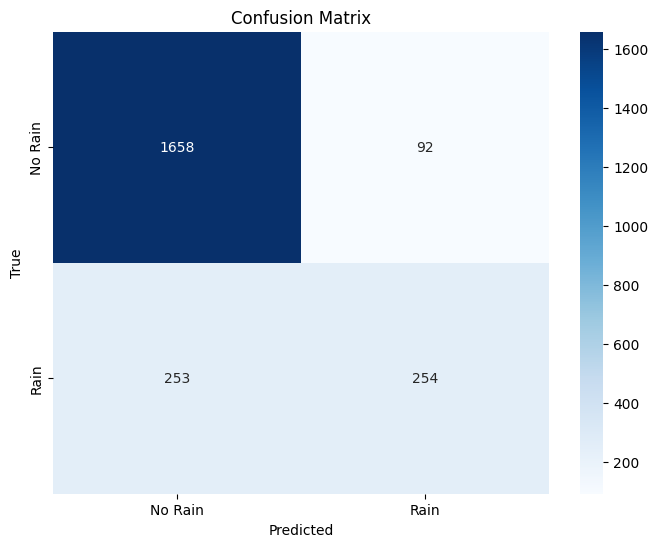

In [13]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Save the plot as an image
plt.savefig('svm_confusion_matrix.png')

# Display the plot
plt.show()